In [0]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/TP4/Inception_GoogleLeNet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Inception Network 

In a typical CNN layer, we use either a stack of 3x3 filters, or a stack of 5x5 filters or a max pooling layer. In general all of these are beneficial to the modelling power of the network. The inception module suggests the use of all of them.

This means instead of adding a particular filter size layer, we add all 1x1, 3x3, 5x5 filters and perform convolution on the output from the previous layers. The output of all the filters are concatenated and passed on as input to the next layer.

The original Inception module used in GoogLeNet.

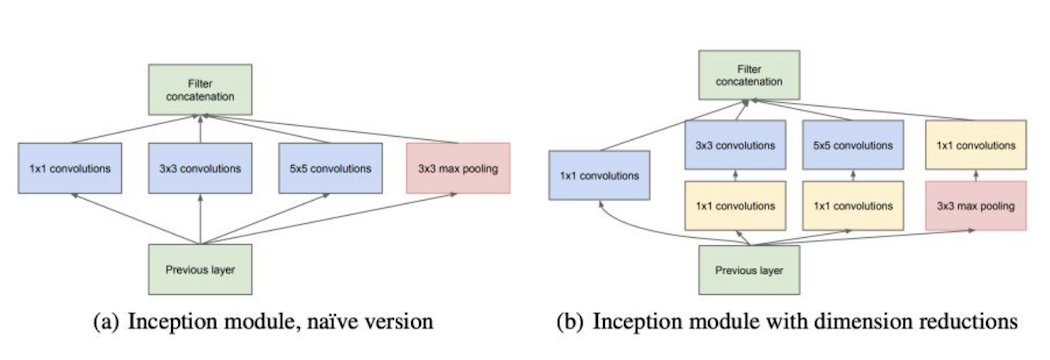

In [0]:
from IPython.display import Image
Image("inception.png")

Question: explain the goal of 1x1 convolutions. If the volume of feature map is 32x32x64 and you use 32 1x1 convolutions, what is the number of trainable parameters? What is the volume of output if stride =1 or 2?

<font color='red'> Les convolutions 1x1 permettent de conserver la taille de l'image en changeant sa profondeur (nombre de canaux). 
Nombre de paramètres= 32 * (1 * 1 * 64 + 1) = 2080

stride=1: output size = 32x32x32
stride=2: output size= 16x16x32 (16=int((32-1+2)/2))

TODO: 
  - implement a network with an Inception module and evaluate the performance for the CIFAR10 database classification (10 classes).
  - do the same thing for a network with several Inception modules (of different versions).

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


Main steps:

- Normalize the input

- Convert the labels to one-hot representation with np_utils.to_categorical

- Build a model and evaluate

You could declare input_img = Input(shape=...), then compute different reponse maps using Conv2D: resp1=Conv2D...

To concatenate response maps, use keras.layers.concatenate: out = keras.layers.concatenate...

To build model: model = Model(inputs = input_img, outputs = out)

In [0]:
pip install np_utils

In [0]:
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import numpy as np
import keras.utils
from keras import utils as np_utils

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

input_img = Input(shape=(32,32,3))
resp1=Conv2D(64,(1,1),activation='relu',padding='same')(input_img)
resp2=Conv2D(64,(3,3),activation='relu',padding='same')(input_img)
resp3=Conv2D(64,(5,5),activation='relu',padding='same')(input_img)
resp4=MaxPooling2D(pool_size=(3, 3),strides=(1,1),padding='same')(input_img)

out=keras.layers.concatenate([resp1,resp2,resp3,resp4], axis=3)
out=Flatten()(out)
out = Dense(10, activation='softmax')(out)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
model = Model(inputs = input_img, outputs = out)
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 64)   256         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 64)   4864        input_4[0][0]                    
____________________________________________________________________________________________

In [0]:
from keras.optimizers import SGD
epochs = 20
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 197us/step - loss: 6.2477 - acc: 0.2896 - val_loss: 5.7527 - val_acc: 0.3876
Epoch 2/20
50000/50000 [==============================] - 10s 191us/step - loss: 5.2295 - acc: 0.4079 - val_loss: 2.8359 - val_acc: 0.4754
Epoch 3/20
50000/50000 [==============================] - 10s 192us/step - loss: 2.7495 - acc: 0.5091 - val_loss: 2.6696 - val_acc: 0.5257
Epoch 4/20
50000/50000 [==============================] - 10s 190us/step - loss: 2.6187 - acc: 0.5501 - val_loss: 2.6792 - val_acc: 0.5448
Epoch 5/20
50000/50000 [==============================] - 10s 192us/step - loss: 2.5121 - acc: 0.5833 - val_loss: 2.6668 - val_acc: 0.5397
Epoch 6/20
50000/50000 [==============================] - 10s 195us/step - loss: 2.4233 - acc: 0.6160 - val_loss: 2.5438 - val_acc: 0.5745
Epoch 7/20
50000/50000 [==============================] - 10s 198us/step - loss: 2.3809 - acc: 0.6284 - val_loss: 2.

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 59.33%


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
input_img = Input(shape = (32, 32, 3))

In [0]:
layer_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_1)
layer_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(64, (5,5), padding='same', activation='relu')(layer_2)
layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(64, (1,1), padding='same', activation='relu')(layer_3)

In [0]:
output = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)
output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

In [0]:
model = Model(inputs = input_img, outputs = out)
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 64)   256         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 32, 32, 64)   256         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 32, 32, 3)    0           input_5[0][0]                    
____________________________________________________________________________________________

In [0]:
epochs = 20
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 314us/step - loss: 0.8715 - acc: 0.6899 - val_loss: 1.1870 - val_acc: 0.6247
Epoch 2/20
50000/50000 [==============================] - 15s 307us/step - loss: 0.5183 - acc: 0.8166 - val_loss: 1.2998 - val_acc: 0.6254
Epoch 3/20
50000/50000 [==============================] - 15s 301us/step - loss: 0.3518 - acc: 0.8788 - val_loss: 1.4738 - val_acc: 0.6261
Epoch 4/20
50000/50000 [==============================] - 15s 301us/step - loss: 0.2440 - acc: 0.9198 - val_loss: 1.6032 - val_acc: 0.6285
Epoch 5/20
50000/50000 [==============================] - 15s 302us/step - loss: 0.1741 - acc: 0.9465 - val_loss: 1.7696 - val_acc: 0.6259
Epoch 6/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.1237 - acc: 0.9666 - val_loss: 1.9056 - val_acc: 0.6202
Epoch 7/20
50000/50000 [==============================] - 15s 302us/step - loss: 0.0896 - acc: 0.9792 - val_loss: 2.

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

[2.6160535802841185, 0.622]
Accuracy: 62.20%
